# 네트워크

**문제 설명**

    네트워크란 컴퓨터 상호 간에 정보를 교환할 수 있도록 연결된 형태를 의미합니다. 예를 들어, 컴퓨터 A와 컴퓨터 B가 직접적으로 연결되어있고, 컴퓨터 B와 컴퓨터 C가 직접적으로 연결되어 있을 때 컴퓨터 A와 컴퓨터 C도 간접적으로 연결되어 정보를 교환할 수 있습니다. 따라서 컴퓨터 A, B, C는 모두 같은 네트워크 상에 있다고 할 수 있습니다.

    컴퓨터의 개수 n, 연결에 대한 정보가 담긴 2차원 배열 computers가 매개변수로 주어질 때, 네트워크의 개수를 return 하도록 solution 함수를 작성하시오.


**제한사항**

- 컴퓨터의 개수 n은 1 이상 200 이하인 자연수입니다.
- 각 컴퓨터는 0부터 n-1인 정수로 표현합니다.
- i번 컴퓨터와 j번 컴퓨터가 연결되어 있으면 computers[i][j]를 1로 표현합니다.
- computer[i][i]는 항상 1입니다.


**입출력 예**


|n|	computers|	return|
|:--:|:----:|:---:|
|3|	[[1, 1, 0], [1, 1, 0], [0, 0, 1]]|	2|
|3|	[[1, 1, 0], [1, 1, 1], [0, 1, 1]]|	1|


**입출력 예 설명**

    예제 #1
    아래와 같이 2개의 네트워크가 있습니다.
    

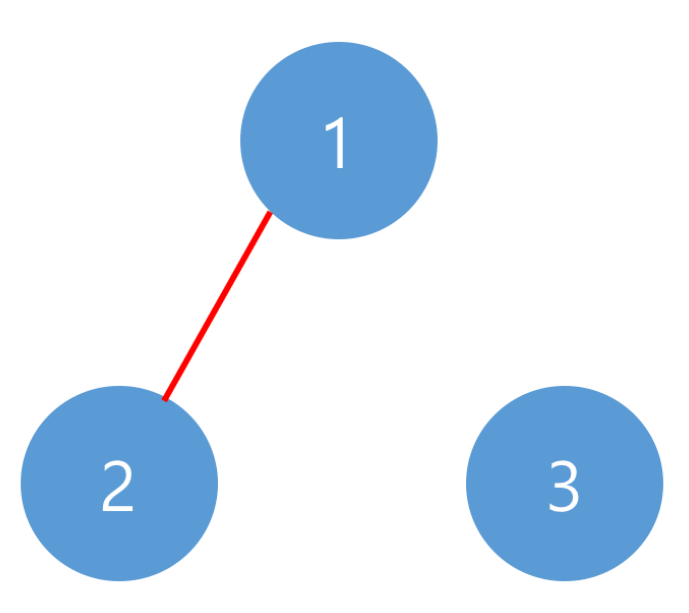

    예제 #2
    아래와 같이 1개의 네트워크가 있습니다.

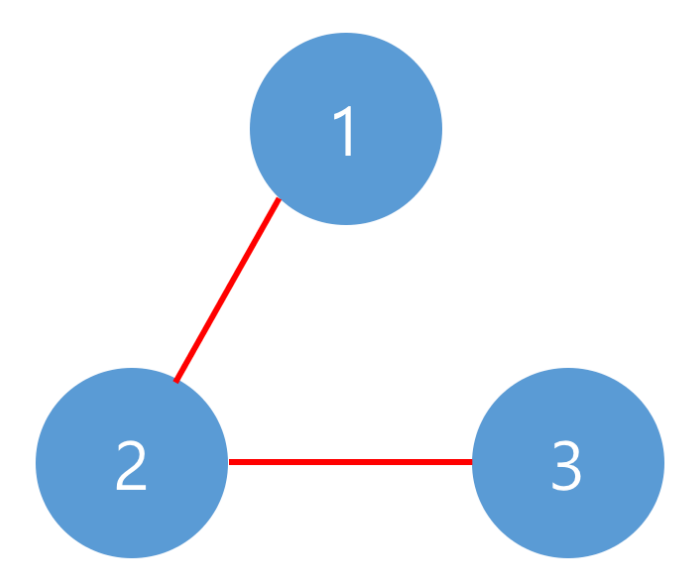

- 하나의 정점에 고유한 그룹이 아닌 여러개의 그룹과 연결될 수 있음을 고려해야했다

In [1]:
# 오답
def find_net(network, v1):
    if network[v1] == v1: return network[v1]
    return find_net(network, network[v1])

def union_net(network, v1, v2):
    a = find_net(network, v1)
    b = find_net(network, v2)
    if a < b: network[b] = a
    else: network[a] = b

def solution(n, computers):

    network = [i for i in range(n)]
    
    for i, computer in enumerate(computers):
        for j in range(i + 1, n):
            
            # i와 j가 서로 연결된 경우
            if computer[j] == 1:
                union_net(network, i, j)

    return len(set(network))

In [2]:
# Test Case 1
n = 3
computers = [[1, 1, 0], [1, 1, 0], [0, 0, 1]]
assert solution(n, computers) == 2

# Test Case 2
n = 3
computers = [[1, 1, 0], [1, 1, 1], [0, 1, 1]]
assert solution(n, computers) == 1

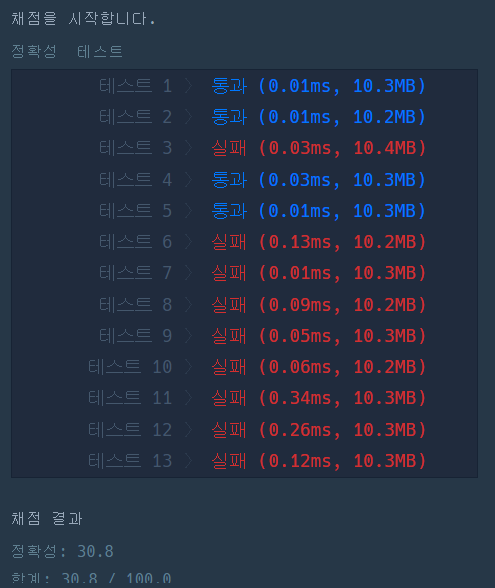

In [3]:
from collections import deque

def solution(n, computers):

    network = [ [] for _ in range(n + 1)]
    visited = [ False for _ in range(n + 1)]

    for i, computer in enumerate(computers):
        for j in range(n):
            if computer[j] == 1 and i != j:
                network[i + 1].append(j + 1)
    
    queue = deque(network[1])
    visited[1] = True
    net_cnt = 0
    
    print(network)
    
    while queue:

        curr = queue.popleft()
        visited[curr] = True
        
        # 연결된거 다 방문
        for adj in network[curr]:
            if not visited[adj]: 
                queue.append(adj)
                
    return 0



In [1]:
# 답안

def solution(n, computers):
    
    parent = [i for i in range(n)]     
    
    def find(v):
        if parent[v] != v:
            parent[v] = find(parent[v])
        return parent[v]
    
    def union(v1, v2):
        a = find(v1)
        b = find(v2)
        if a < b: parent[b] = a
        else: parent[a] = b
    
    
    for i in range(n):
        for j in range(i+1, n):
            if computers[i][j] == 1:
                if find(i) != find(j):
                    union(i, j)
    
    for i in range(n):
        find(i)
    
    return len(set(parent))

In [2]:
# Test Case 1
n = 3
computers = [[1, 1, 0], [1, 1, 0], [0, 0, 1]]
assert solution(n, computers) == 2

# Test Case 2
n = 3
computers = [[1, 1, 0], [1, 1, 1], [0, 1, 1]]
assert solution(n, computers) == 1

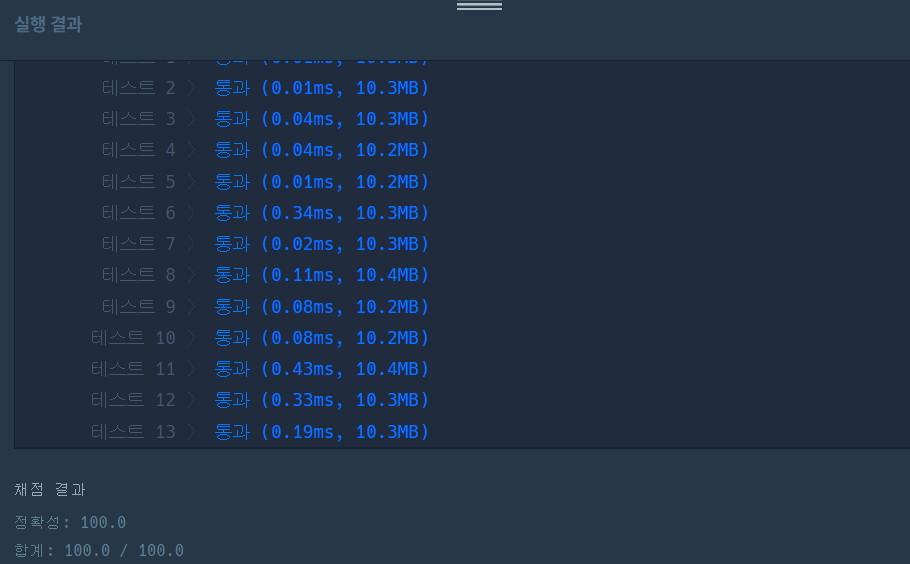